### ASSIGNMENT - 13
### Topic - KNN_glass_problem
### By Tushar N. Mondkar (Batch of 27 March,Andheri)
### Mentor - Jayantilal Sir

__Q Prepare a model for glass classification using KNN__

In [27]:
#Importing necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [28]:
#Loading of data
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [29]:
#Checking of null values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [30]:
# replacing the glass_types from numbers to it's respective classes
df['Type'] = df['Type'].replace({1:'building_windows_float_processed',2:'building_windows_non_float_processed',3:'vehicle_windows_float_processed',5:'containers',6:'tableware',7:'headlamps'})
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [31]:
#Scaling of data(Standardization)

scaler = StandardScaler()
sc_df = pd.DataFrame(scaler.fit_transform(df.drop('Type', axis=1)))
sc_df.head()


,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [32]:
#Splitting of data

X = sc_df
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Text(0, 0.5, 'Error Rate')

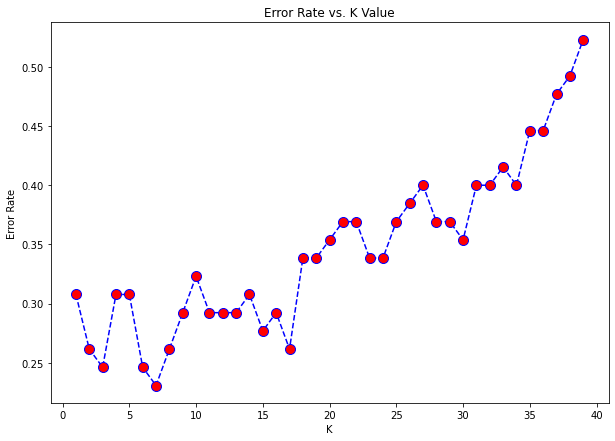

In [33]:
#Error Rates

error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test != preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
# From graph it can be seen that k = 1 gives optimum error,hence taking k as 1

k = 1
knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)


In [35]:
# Evaluation of model

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))


[[12  2  0  0  0  4]
 [ 3 18  2  0  0  1]
 [ 1  0  2  0  0  0]
 [ 1  0  1 10  1  0]
 [ 0  1  0  0  2  0]
 [ 1  2  0  0  0  1]]
                                      precision    recall  f1-score   support

    building_windows_float_processed       0.67      0.67      0.67        18
building_windows_non_float_processed       0.78      0.75      0.77        24
                          containers       0.40      0.67      0.50         3
                           headlamps       1.00      0.77      0.87        13
                           tableware       0.67      0.67      0.67         3
     vehicle_windows_float_processed       0.17      0.25      0.20         4

                            accuracy                           0.69        65
                           macro avg       0.61      0.63      0.61        65
                        weighted avg       0.73      0.69      0.71        65



In [36]:
# actual vs predicted
df_test = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_test

,Actual,Predicted
12,building_windows_float_processed,building_windows_non_float_processed
194,headlamps,headlamps
208,headlamps,headlamps
43,building_windows_float_processed,building_windows_float_processed
82,building_windows_non_float_processed,vehicle_windows_float_processed
...,...,...
59,building_windows_float_processed,vehicle_windows_float_processed
109,building_windows_non_float_processed,containers
22,building_windows_float_processed,building_windows_float_processed
46,building_windows_float_processed,building_windows_non_float_processed


### Implimentation of SMOTE to increase accuracy

In [57]:
print(X_train.shape)
print(y_train.shape)

(149, 9)
(149,)


In [38]:
pip install imblearn


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [41]:
print(X_train_res.shape)
print(y_train_res.shape)

(312, 9)
(312,)


Text(0, 0.5, 'Error Rate')

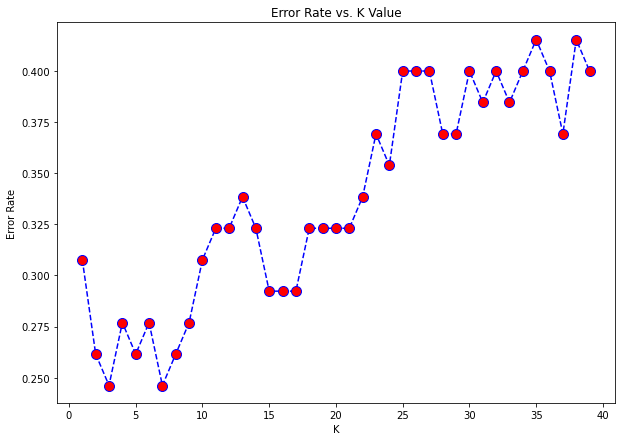

In [42]:
#Error Rates

error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    knn.fit(X_train_res, y_train_res)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test != preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

__Choosing k as 3 as it is giving least error__

In [59]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
knn.fit(X_train_res, y_train_res)
preds = knn.predict(X_test)


In [60]:
# Evaluation of model

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))


[[14  2  0  0  0  2]
 [ 4 17  2  0  0  1]
 [ 0  0  3  0  0  0]
 [ 1  0  1 10  1  0]
 [ 0  0  0  0  3  0]
 [ 1  1  0  0  0  2]]
                                      precision    recall  f1-score   support

    building_windows_float_processed       0.70      0.78      0.74        18
building_windows_non_float_processed       0.85      0.71      0.77        24
                          containers       0.50      1.00      0.67         3
                           headlamps       1.00      0.77      0.87        13
                           tableware       0.75      1.00      0.86         3
     vehicle_windows_float_processed       0.40      0.50      0.44         4

                            accuracy                           0.75        65
                           macro avg       0.70      0.79      0.72        65
                        weighted avg       0.79      0.75      0.76        65



In [58]:
# actual vs predicted
df_test = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_test

,Actual,Predicted
12,building_windows_float_processed,building_windows_non_float_processed
194,headlamps,headlamps
208,headlamps,headlamps
43,building_windows_float_processed,building_windows_float_processed
82,building_windows_non_float_processed,vehicle_windows_float_processed
...,...,...
59,building_windows_float_processed,building_windows_float_processed
109,building_windows_non_float_processed,containers
22,building_windows_float_processed,building_windows_float_processed
46,building_windows_float_processed,building_windows_float_processed


__After using Smote accuarcy became 75% from 69% aand f1 score is also incresed to a value of 0.74__